In [1]:
#Importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Reading the Data from Excel file and creating DataFrame

cardio_train = pd.read_excel("cardio_train.xlsx")
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [6]:
cardio_train.shape

(69301, 13)

Showing the Shape of the dataset is 69301 rows and 13 columns, Now let's move to Data pre-processing

In [19]:
cardio_train=cardio_train.drop(columns=['id'])
cardio_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [20]:
cardio_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


There is No Null Values in Any column

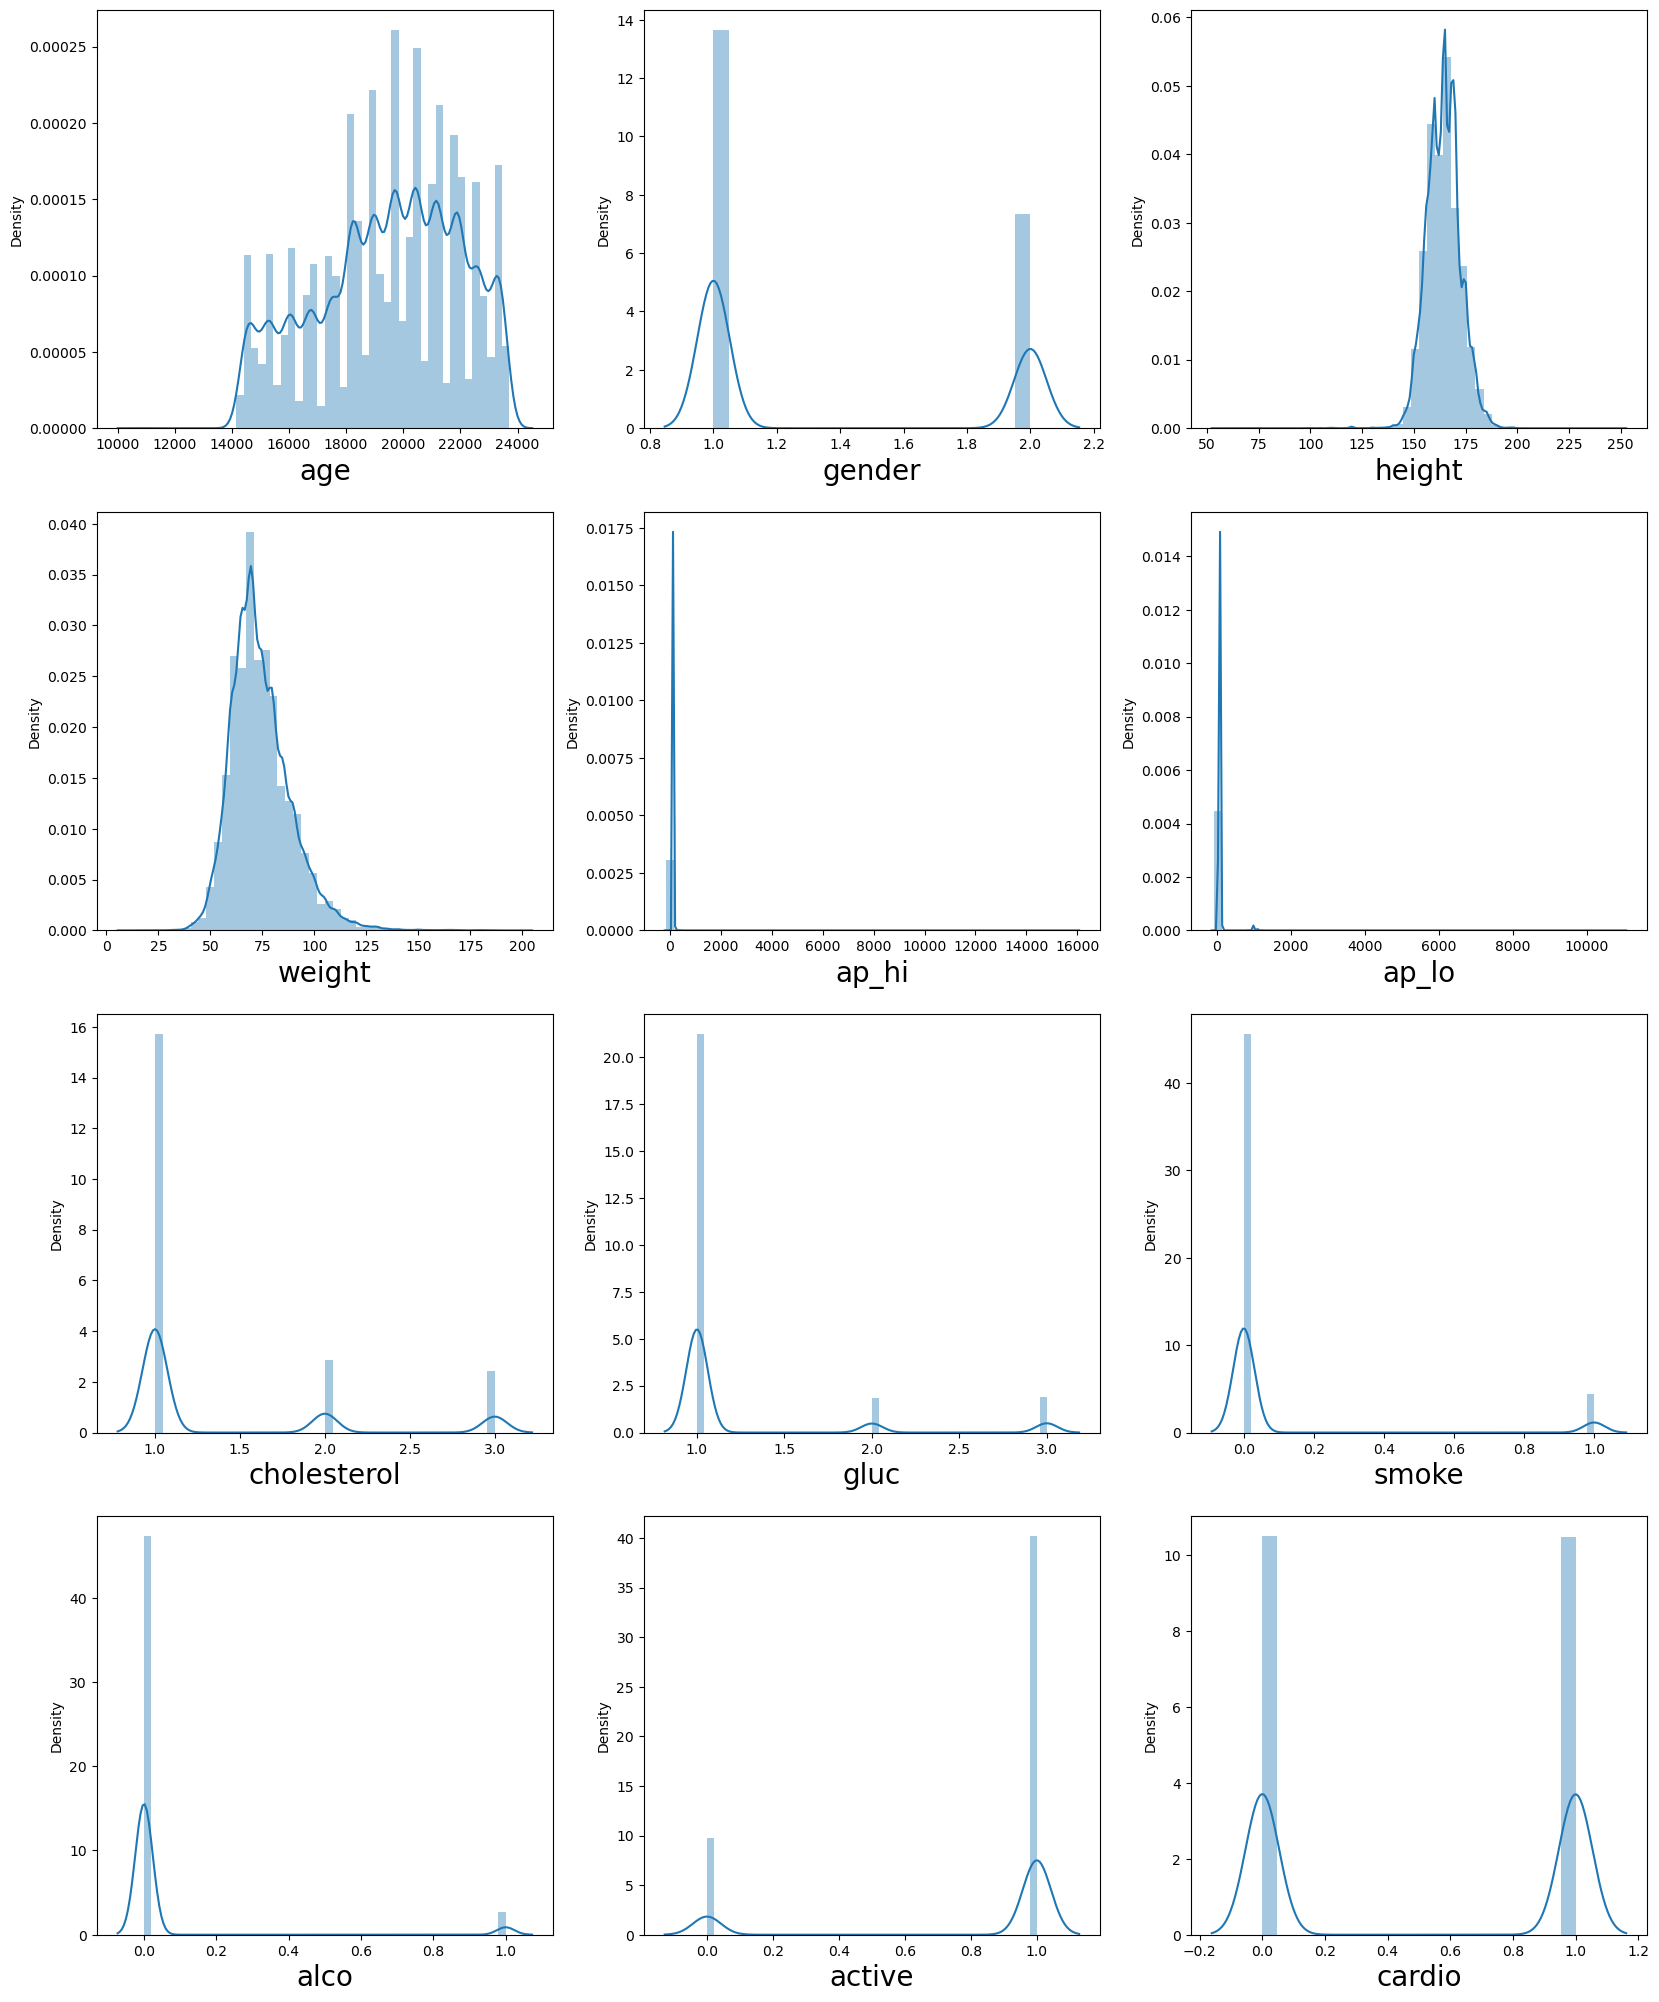

In [23]:
# Checking How the data is distributed for every column using distplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in cardio_train:
    if plotnumber<=12 :     
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(cardio_train[column])
        plt.xlabel(column,fontsize=20)
      
    plotnumber+=1
plt.show()

Looking all the Data is Normal

In [24]:
cardio_features = cardio_train.drop('cardio',axis=1)

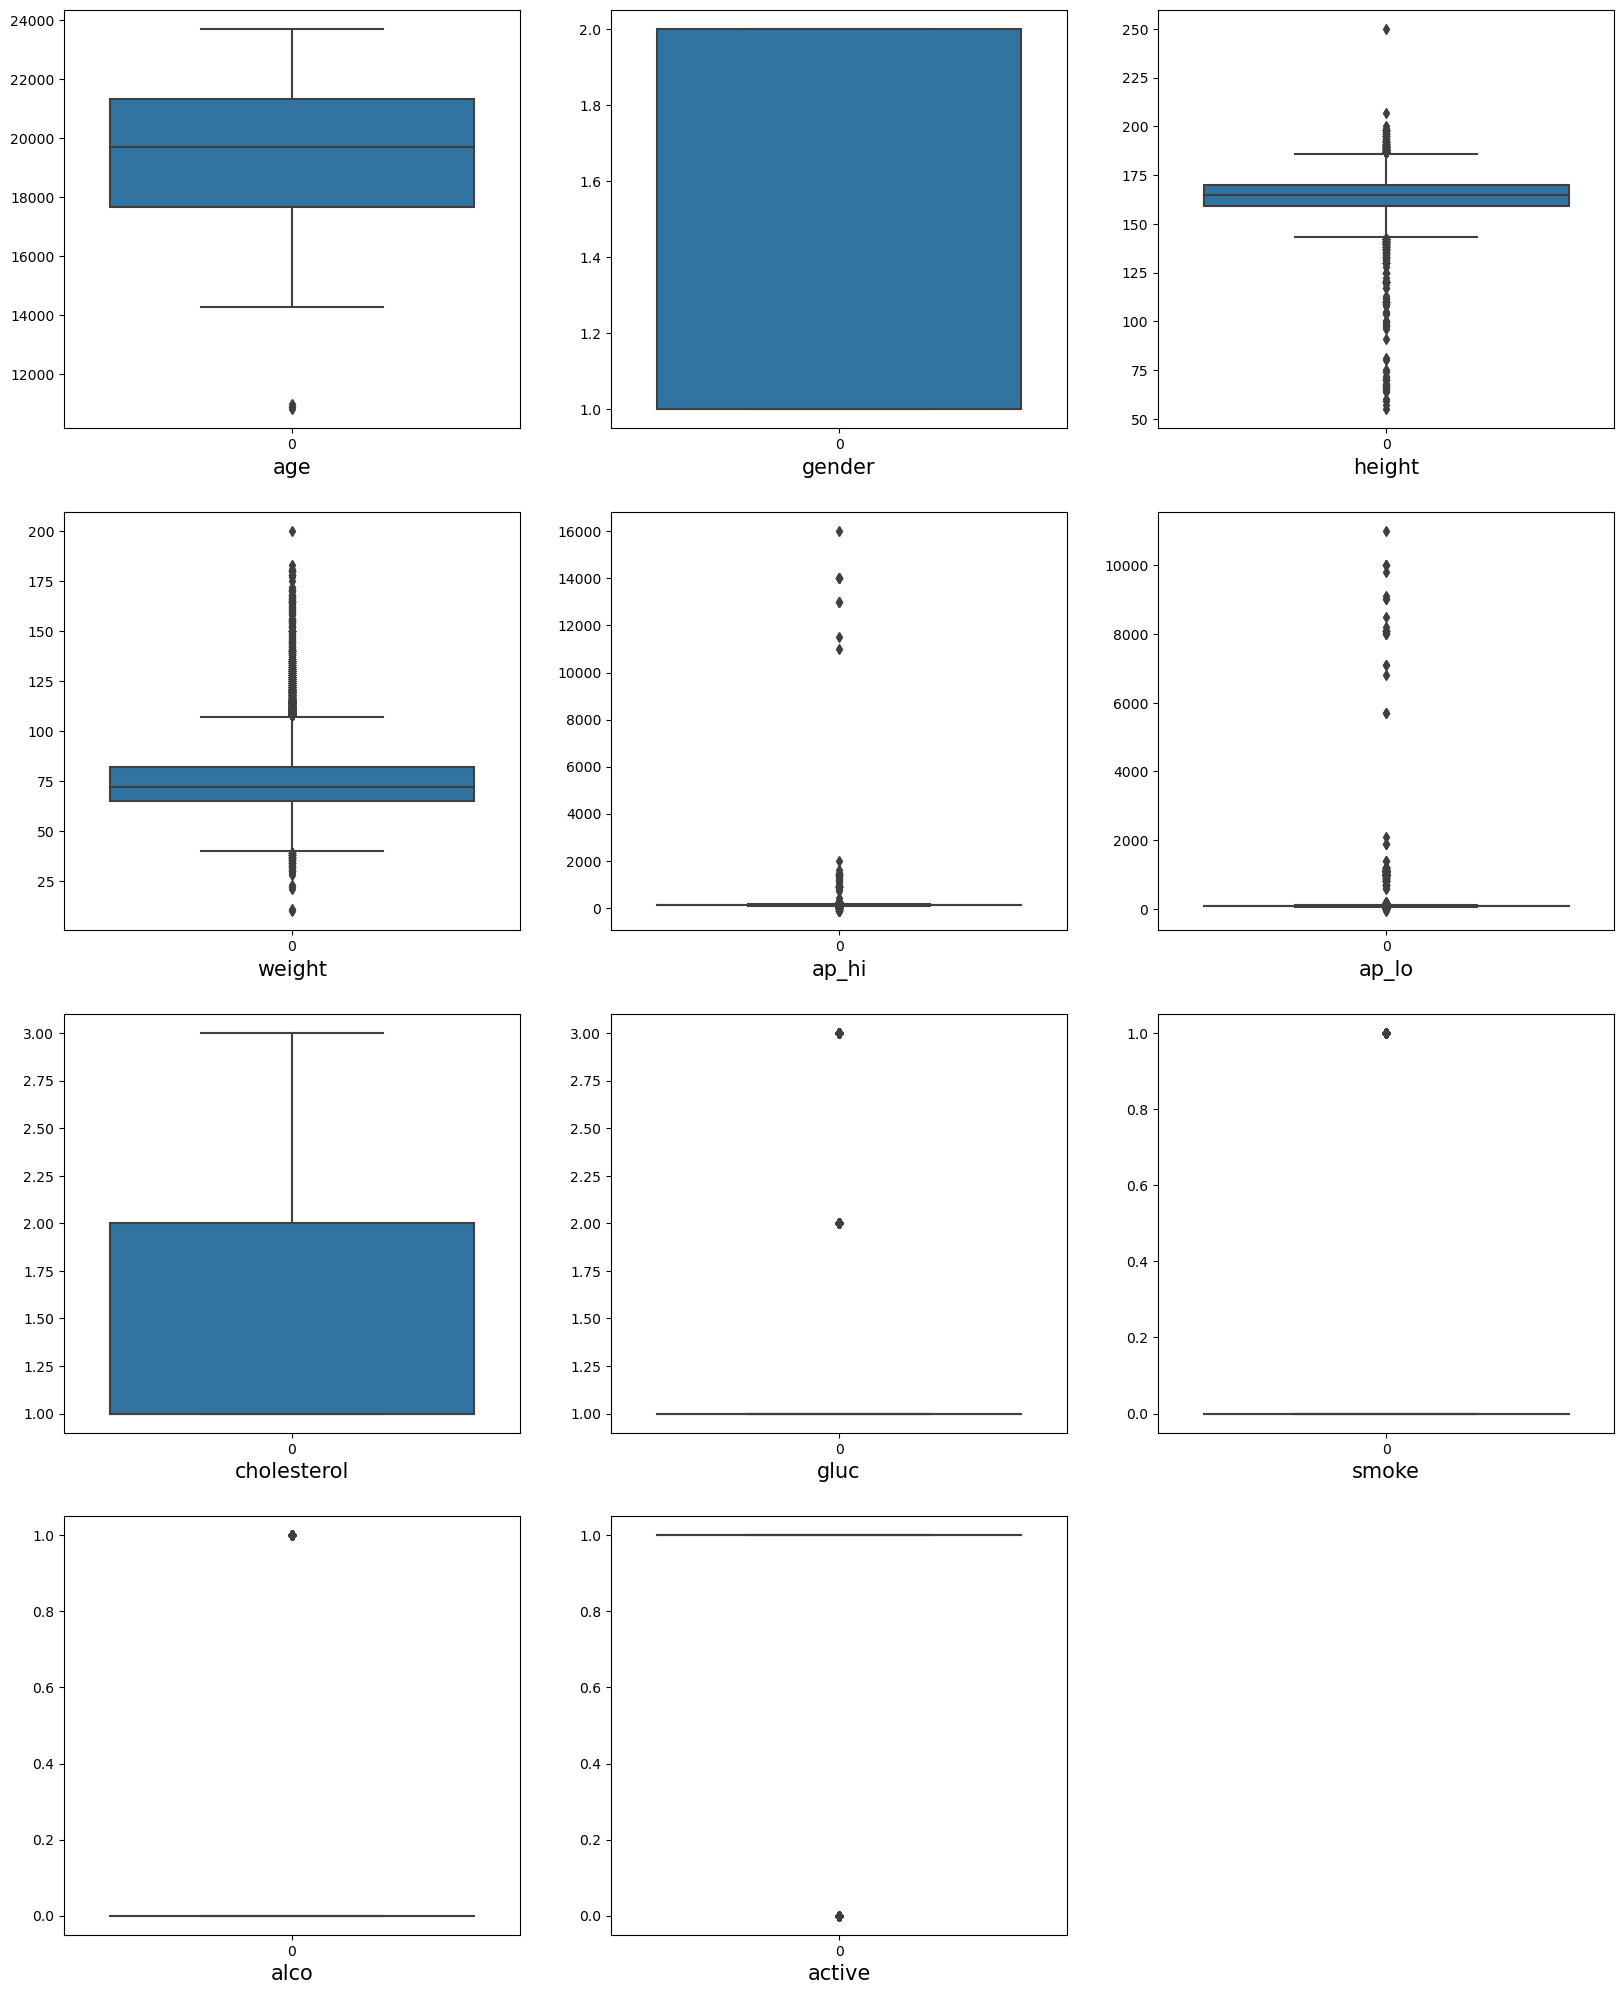

In [25]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in cardio_features:
    if graph<=12:    
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data= cardio_features[column])
        plt.xlabel(column,fontsize=15)      
    graph+=1
plt.show()